# UniversalBank using Machine Learning

## Import Libaraies

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Upload Dataset

In [43]:
df = pd.read_csv('/content/UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [44]:
# drop ID and Zip Code in dataset
df.drop(['ID','ZIPCode'],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [45]:
# convert columns into lowercase
df.columns = df.columns.str.lower()
df.head()

,age,experience,income,family,ccavg,education,mortgage,personalloan,securitiesaccount,cd account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


# Exploratory Data Analysis

## Understanding the Dataset

**Check Shape of Dataset**

In [46]:
df.shape

(5000, 12)

**Dataset columns**

In [47]:
df.columns

Index(['age', 'experience', 'income', 'family', 'ccavg', 'education',
       'mortgage', 'personalloan', 'securitiesaccount', 'cd account', 'online',
       'creditcard'],
      dtype='object')

**Info of Dataset**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5000 non-null   int64  
 1   experience         5000 non-null   int64  
 2   income             5000 non-null   int64  
 3   family             5000 non-null   int64  
 4   ccavg              5000 non-null   float64
 5   education          5000 non-null   int64  
 6   mortgage           5000 non-null   int64  
 7   personalloan       5000 non-null   int64  
 8   securitiesaccount  5000 non-null   int64  
 9   cd account         5000 non-null   int64  
 10  online             5000 non-null   int64  
 11  creditcard         5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


**Data Type of Dataset**

In [49]:
df.dtypes

,0
age,int64
experience,int64
income,int64
family,int64
ccavg,float64
education,int64
mortgage,int64
personalloan,int64
securitiesaccount,int64
cd account,int64


**descriptive Statistic**

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
ccavg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
personalloan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
securitiesaccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
cd account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


# Data Cleaning

## Handling Missing Values

**Check Missing Values in Dataset**

In [51]:
df.isnull().sum()

,0
age,0
experience,0
income,0
family,0
ccavg,0
education,0
mortgage,0
personalloan,0
securitiesaccount,0
cd account,0


In [52]:
df.isnull().sum().sum()

0

## Remove Duplicates

In [53]:
df.duplicated().sum()

13

In [54]:
df.loc[df.duplicated()]

,age,experience,income,family,ccavg,education,mortgage,personalloan,securitiesaccount,cd account,online,creditcard
799,29,3,39,4,2.10,3,0,0,0,0,1,0
1026,28,4,43,3,0.10,2,0,0,0,0,1,0
1526,36,10,80,4,2.20,2,0,0,0,0,1,0
2031,60,35,80,3,0.50,1,0,0,0,0,1,0
2806,53,27,59,2,0.80,3,0,0,0,0,1,0
3050,50,25,58,1,1.30,2,0,0,0,0,1,0
3453,29,3,31,4,0.30,2,0,0,0,0,1,0
3694,38,8,21,1,0.67,3,0,0,0,0,1,0
4058,39,15,65,1,1.50,3,0,0,0,0,0,0
4482,40,14,28,2,0.80,3,0,0,0,0,0,0


In [55]:
# drop duplicates value in dataset permanantly
df.drop_duplicates(inplace=True)

In [56]:
df.duplicated().sum()

0

## Data Analysis

**Distribution Plot**

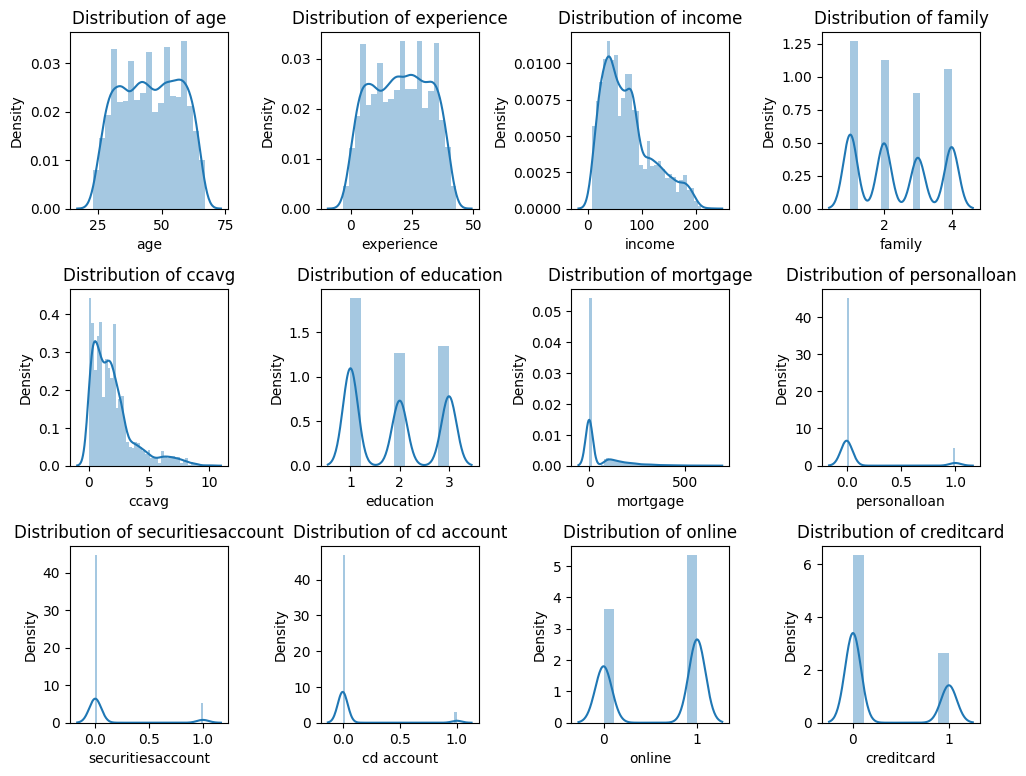

In [57]:
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
   plt.subplot(4, 4, i + 1)
   sns.distplot(df[col], kde=True)
   plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Correlation with visual graphic**

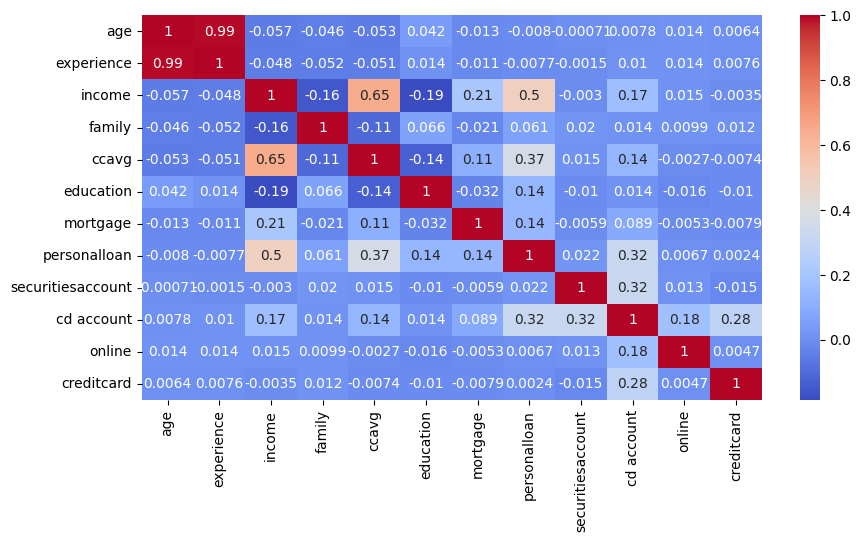

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True,cmap='coolwarm')
plt.show()

## Handle Outliers

**Indify Outliter using Boxplot**

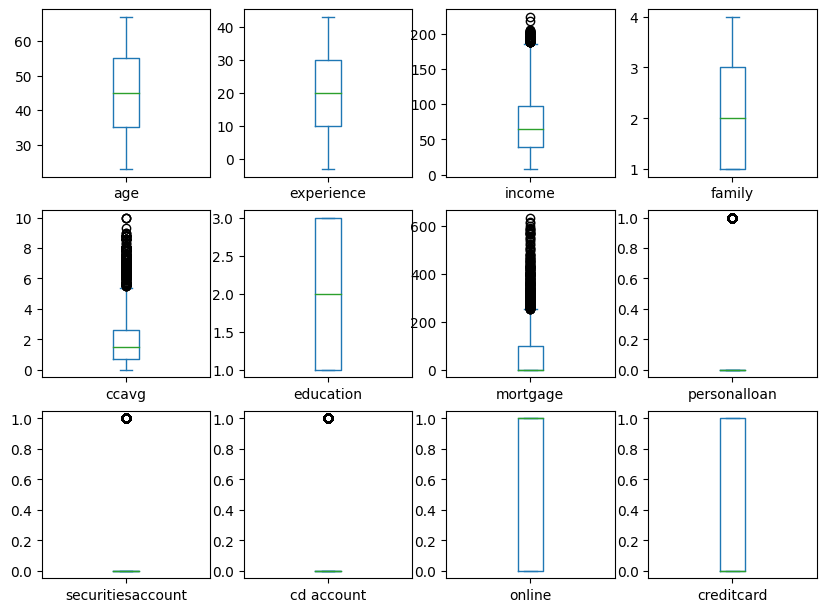

In [59]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))
plt.show()

**Remove Outlier using IQR**

In [60]:
def remove_outliers(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3 -q1
  lb = q1 - 1.5*iqr
  ub = q3 + 1.5 * iqr
  return lb,ub

In [61]:
columns = ['income','ccavg','mortgage','securitiesaccount','cd account']
for i in columns:
  lb,ub = remove_outliers(df[i])
  df[i] = np.where(df[i]<lb,lb,df[i])
  df[i] = np.where(df[i]>ub,ub,df[i])

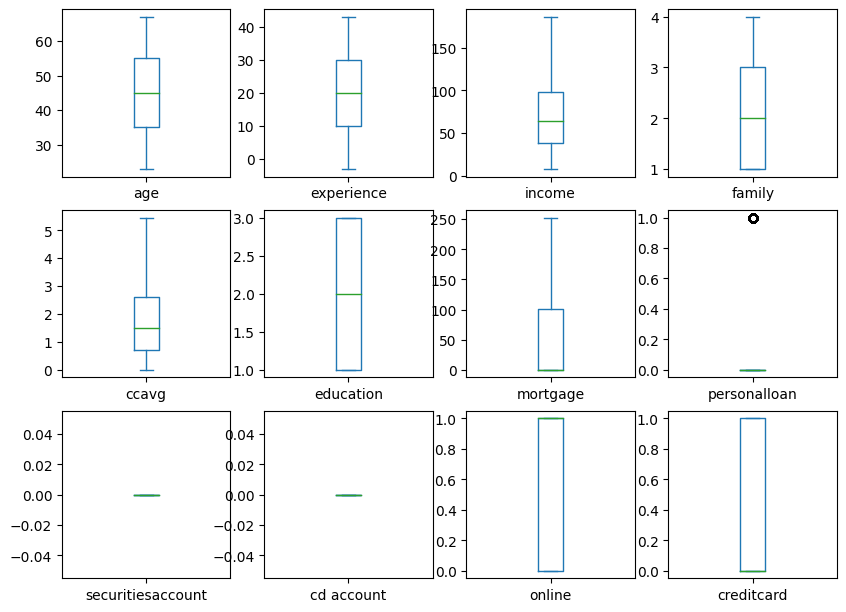

In [62]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))
plt.show()

## Splitting the Dataset

**Train-Test Split dataset**

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['personalloan'])
y = df['personalloan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [65]:
# convert X_train_scale into dataframe
X_train_scale = pd.DataFrame(X_train_scale,columns=X_train.columns)
X_train_scale.head()

,age,experience,income,family,ccavg,education,mortgage,securitiesaccount,cd account,online,creditcard
0,-0.368668,-0.263232,-0.066331,-0.339637,0.910699,-1.047910,-0.605809,0.0,0.0,0.817947,1.537337
1,0.237415,0.256458,0.087102,1.407379,1.180620,1.335958,-0.605809,0.0,0.0,0.817947,-0.650475
2,1.016664,0.949377,-0.351277,-1.213144,-1.113705,-1.047910,1.515005,0.0,0.0,0.817947,-0.650475
3,1.103247,1.209222,-1.206117,-1.213144,-0.438903,1.335958,-0.605809,0.0,0.0,-1.222573,-0.650475
4,-0.022335,-0.003387,-0.965008,-1.213144,-1.181185,-1.047910,-0.605809,0.0,0.0,0.817947,-0.650475


## SVC Model Train

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
svc = SVC()
# fit model
svc.fit(X_train_scale,y_train)

SVC()

In [68]:
# predict
y_pred = svc.predict(X_test_scale)

In [69]:
# Model Accuracy Score
score = accuracy_score(y_test,y_pred)
score

0.9719438877755511

In [70]:
# classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.96      0.73      0.83        94

    accuracy                           0.97       998
   macro avg       0.97      0.87      0.91       998
weighted avg       0.97      0.97      0.97       998



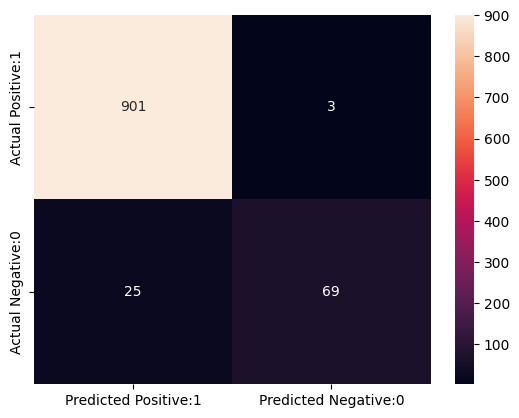

In [71]:
# confusion matrix with graph
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted Positive:1', 'Predicted Negative:0'], index=['Actual Positive:1','Actual Negative:0'])
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.show()

## Hyperparameter Tuning using GridSearchCV

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [73]:
dtc = DecisionTreeClassifier()
# parameter grid for Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5]
}

grid_search = GridSearchCV(
                            estimator=dtc,
                            param_grid=param_grid,
                            cv=5,
                            n_jobs=-1
)
# fit model
grid_search.fit(X_train_scale,y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [74]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=1,min_samples_split=2)
# fit model
dtc.fit(X_train_scale,y_train)
# predict
y_pred1 = dtc.predict(X_test_scale)
# Model Accuracy Score
score = accuracy_score(y_test,y_pred1)*100
score

98.39679358717434

In [75]:
# classification Report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.99      0.84      0.91        94

    accuracy                           0.98       998
   macro avg       0.99      0.92      0.95       998
weighted avg       0.98      0.98      0.98       998



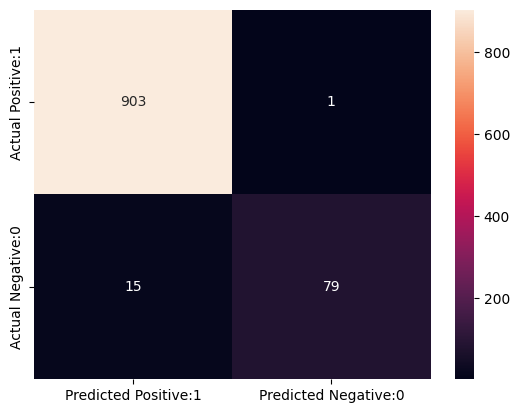

In [76]:
# confusion matrix with graph
conf_matrix = confusion_matrix(y_test,y_pred1)
conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted Positive:1', 'Predicted Negative:0'], index=['Actual Positive:1','Actual Negative:0'])
sns.heatmap(conf_matrix,annot=True,fmt='d')
plt.show()